In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Завантаження та підготовка даних
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормалізація (перетворення значень пікселів до діапазону [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:

# 2. Побудова моделі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Розгортання 28x28 у вектор
    layers.Dense(128, activation='relu'),      # Повнозв’язаний шар
    # layers.Dropout(0.2),                       # Dropout для запобігання перенавчанню
    layers.Dense(10, activation='softmax')     # Вихідний шар (10 класів)
])

# 3. Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Навчання моделі
model.fit(x_train, y_train, epochs=5)

# 5. Оцінювання на тестовому наборі
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nТочність на тестових даних:', test_acc)

# 6. Приклад передбачення
predictions = model.predict(x_test)


c:\Users\mykro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8744 - loss: 0.4346
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9641 - loss: 0.1224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9753 - loss: 0.0816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9825 - loss: 0.0569
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0442
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0932

Точність на тестових даних: 0.9763000011444092
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


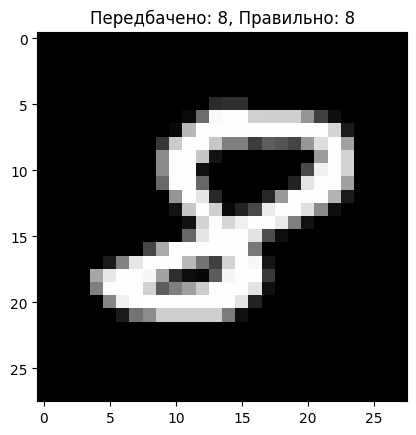

In [3]:
#

import random

index = random.randint(0, 100)
# Показати перше зображення та передбачений клас
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Передбачено: {tf.argmax(predictions[index]).numpy()}, Правильно: {y_test[index]}")
plt.show()


c:\Users\mykro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8967 - loss: 0.3335 - val_accuracy: 0.9820 - val_loss: 0.0636
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9837 - loss: 0.0519 - val_accuracy: 0.9862 - val_loss: 0.0468
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.9890 - val_loss: 0.0382
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9898 - val_loss: 0.0402
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9895 - val_loss: 0.0418
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9840 - loss: 0.0484

Точність на тестових даних: 0.9886000156402588
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


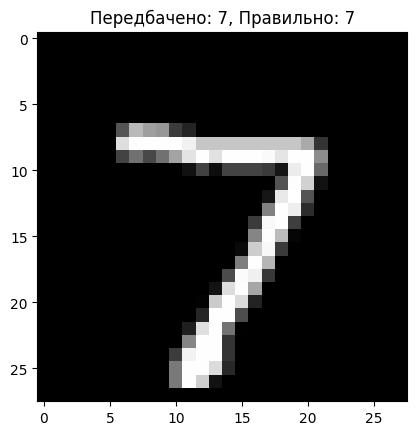

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Завантаження та підготовка даних
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# CNN очікує 4D тензор: (кількість_зразків, висота, ширина, кількість_каналів)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 2. Побудова CNN моделі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # згортковий шар
    layers.MaxPooling2D((2, 2)),                                            # субдискретизація
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),                                                      # перетворення вектора
    layers.Dense(64, activation='relu'),                                   # повнозв’язаний шар
    layers.Dense(10, activation='softmax')                                 # вихідний шар
])

# 3. Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Навчання моделі
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 5. Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nТочність на тестових даних:', test_acc)

# 6. Візуалізація передбачення
predictions = model.predict(x_test)

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Передбачено: {tf.argmax(predictions[0]).numpy()}, Правильно: {y_test[0]}")
plt.show()
